# Customer Segmentation using Clustering
#### Goal: Use clustering algorithms to segment customers based on their spending behavior,age, income, and preferences.

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans


###Understanding the Dataset

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head() #Display first few rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape #checking the shape(rows,columns)

(200, 5)

In [4]:
df.dtypes #checking data types for columns

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [5]:
#Summary statistics for the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#Count missing values per column
df.isnull().sum() # No missing values

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
df.drop(columns=['CustomerID'], inplace=True)  # Drop unnecessary column


### **Univariate Analysis**: examining distributions of a single variable

Visualising Numerical Features: Age, Income, Spending Score

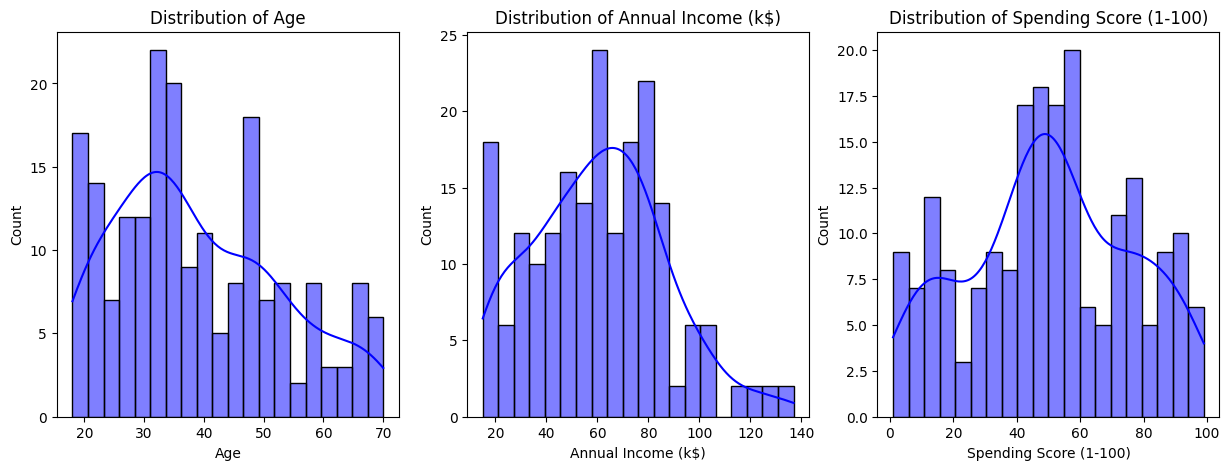

In [8]:
#Visualising with Histograms
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
plt.figure(figsize=(15, 5))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], bins=20, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
plt.show()

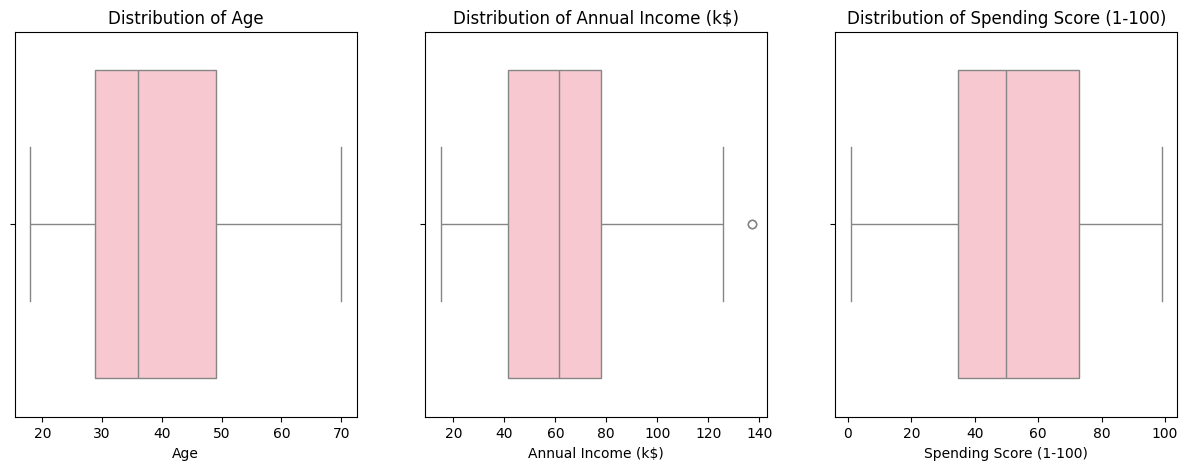

In [9]:
# Visualising with Boxplot
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
plt.figure(figsize=(15, 5))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[col], color='pink')
    plt.title(f'Distribution of {col}')
plt.show()

Visualising Categorical Features Distribution:

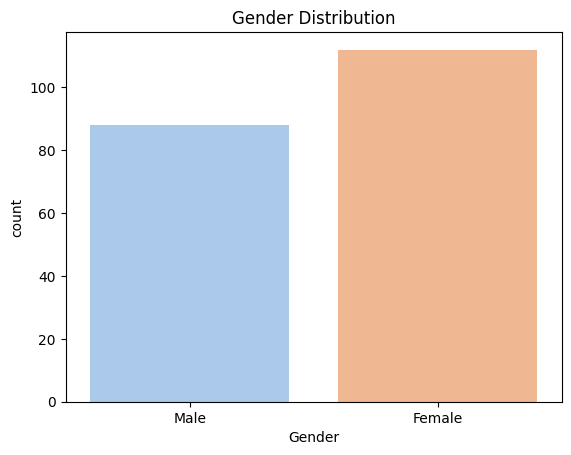

In [10]:
# More Female customers than Male
sns.countplot(x=df['Gender'], palette='pastel')
plt.title('Gender Distribution')
plt.show()

### **Bivariate Analysis** : examining relationships between two variables

### Age vs Spending Score w.r.t Gender
This will help to identify spending patterns for different customer age groups according to the Gender.

Points are evenly distributed in this scatterplot, but younger people below the ages of 40 have a higher spending score as compared to older people. From this insight, businesses can create marketing strategies or promotions based on age segments.

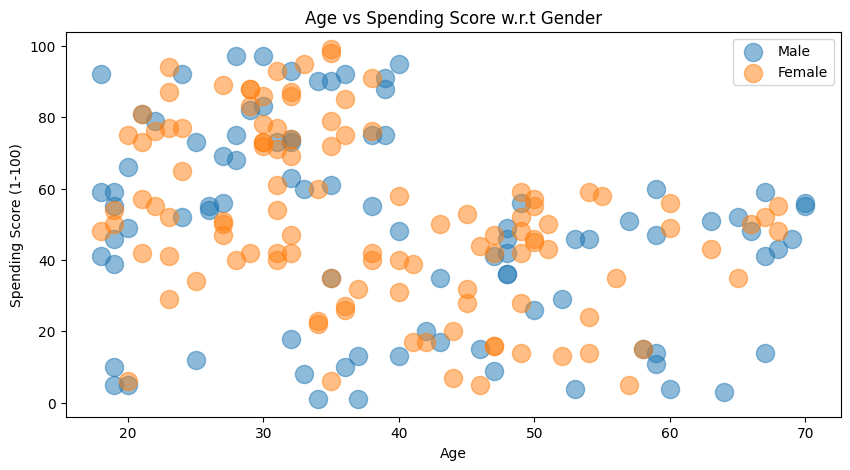

In [11]:
#Scatter plot
plt.figure(1 , figsize = (10 , 5))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 170 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score w.r.t Gender')
plt.legend() #Adding a list of gender labels for the colored scatter points
plt.show()

### Annual Income vs Spending Score w.r.t Gender
This will help to identify male and female customer spending patterns according to their income. From this scatterplot, in the average spending score around 50, we can see there are more female customers with Annual Income range between 40k$-65k$ but other than that, the points are evenly scattered so male or female irrespective of their annual income, their spending scores are not impacted by their income.

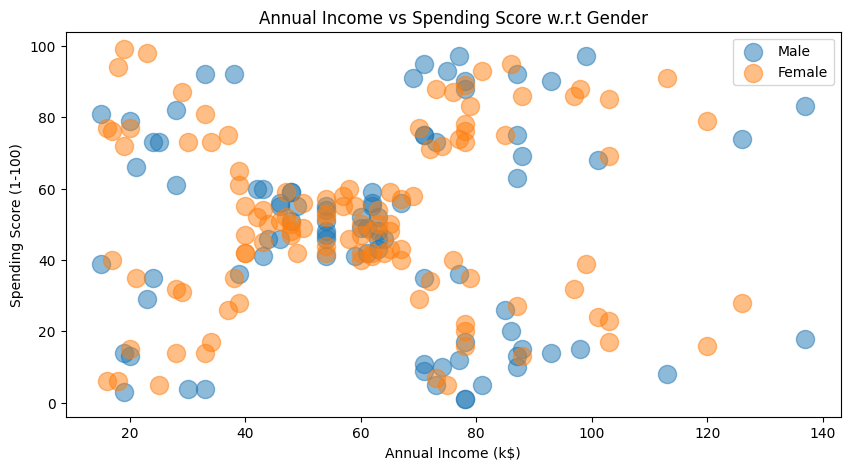

In [12]:
plt.figure(1 , figsize = (10 , 5))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 170 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

### **Correlation Analysis**

In a heatmap, the correlation coefficient values range from -1.0 to 1.0

Values close to 1.0 will have a stronger positive correlation which means as one variable increases, the other increases. Values close to -1.0 have a strong negative correlation, as one increases the other decreases. Values closer to 0 means no strong relationship.

In this heatmap, we can see correlations between Age and Spending Score which is -0.33 which means younger people are more likely to spend more. In this way, the correlation between Annual Income and Gender against Spending Score are closer to 0.0 which indicates they do not affect Spending Score much.




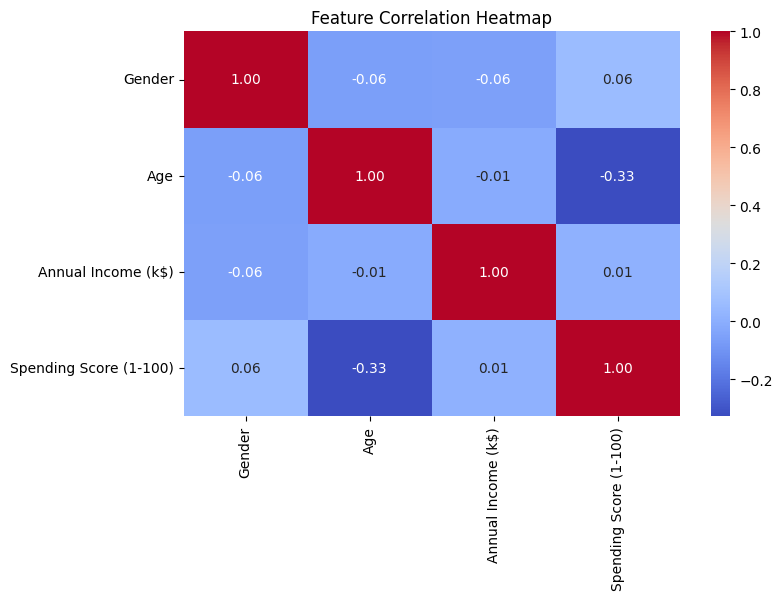

In [13]:
#Converting Categorical Data to Numerical for Correlation Analysis
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

## Clustering Customer Segments using K-Means algorithm

Since we want to segment customers into different groups based on their spending pattern and features, we are using K-Means which creates clusters based on distances, and because distances are calculated by between observations defined by their feature values, the features you choose to input into the algorithm heavily influence the clusters that are created.

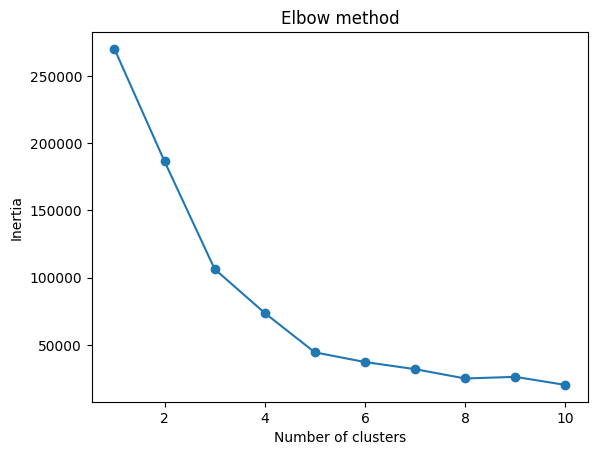

In [14]:
"""First, we want to find the best value for K (number of clusters) using the elbow method which
lets us graph the inertia (sum of squared distances of points to their closest cluster center) and visualize the point at which it starts decreasing linearly.
This point is referred to as the "elbow" and is a good estimate for the best value for K based on our data.
"""
#Segmentation using Annual Income and Spending Score
X1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
inertias = [] #store inertia values for different cluster numbers.

#Iterate through possibly 10 cluster numbers
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X1)
    inertias.append(kmeans.inertia_) #inertia_ is the formula for segregating data points into clusters.

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# We can see the best value for choosing the number of clusters here would be K=5 as this is the point where the graph declines linearly.

### From this scatterplot, we can identify five different types of customer groups:

*   **Low-income, high-spending customers:** potential impulse buyers
*   **High-income, high-spending customers:** likely premium buyers
*   **Low-income, low-spending customers:** buyers on a budget
*  **High-income, low-spending customers:** buyers who want to save
*   **Mid-range customers:** balanced spending behavior




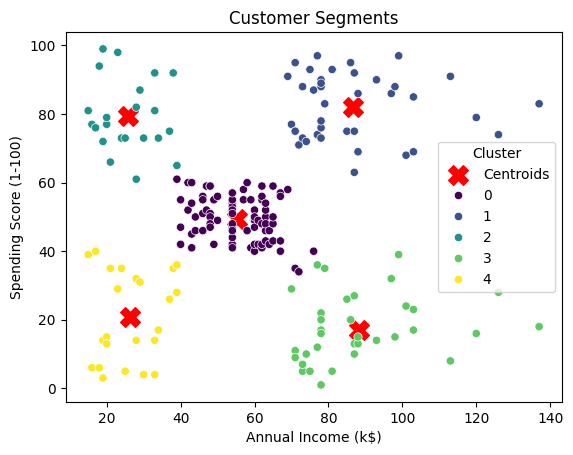

In [15]:
# Segmentation using Annual Income and Spending Score
X1 = df[['Annual Income (k$)', 'Spending Score (1-100)']] #selecting features for clustering
kmeans = KMeans(n_clusters=5, random_state=42) #creating 5 clusters
df['Cluster'] = kmeans.fit_predict(X1) # For every customer, we can assign a cluster label

#Getting cluster centers
centers = kmeans.cluster_centers_

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments')
plt.show()

### From the scatterplot of segmentating customers based on their Age and Spending score, we can identify four different customer age groups:


*   **Younger high-spending customers:** Customers below age 40 likely to be young professionals or students
*  **Younger mid-spending customers:** Customers below age 40 with a balanced spending behavior more likely to be ones with families or stable income earners
*   **Middle age low spending customers:** Customers between ages 35-60 have low spending behavior could be people on a budget within this age group
*   **Older mid-spending customers:** Customers above age 40 who have a balanced spending behavior could be retirees, financially stable middle aged professionals.





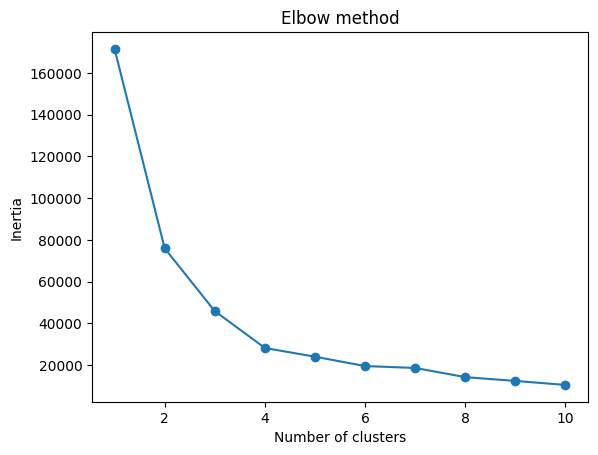

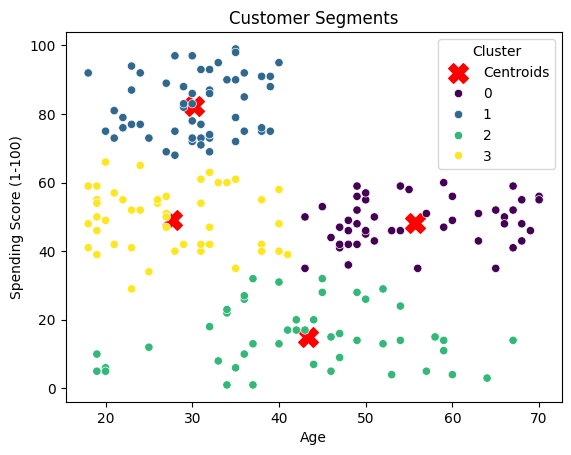

In [16]:
#Segmentation using Age and Spending score
X2 = df[['Age', 'Spending Score (1-100)']] #selecting features for clustering

inertias = [] #store inertia values for different cluster numbers.

#Iterate through possibly 10 cluster numbers
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X2)
    inertias.append(kmeans.inertia_) #inertia_ is the formula for segregating data points into clusters.

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42) #creating 4 clusters as optimal value for K=4
df['Cluster'] = kmeans.fit_predict(X2) # For every customer, we can assign a cluster label

#Getting cluster centers
centers = kmeans.cluster_centers_

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')

sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments')
plt.show()

### Creating a 3D Visualisation for the clusters across Age, Annual income and Spending score. With this visualisation, we can see how younger customers vary across three clusters who earn annual income between 60-100k$ have a mid to high level spending score.

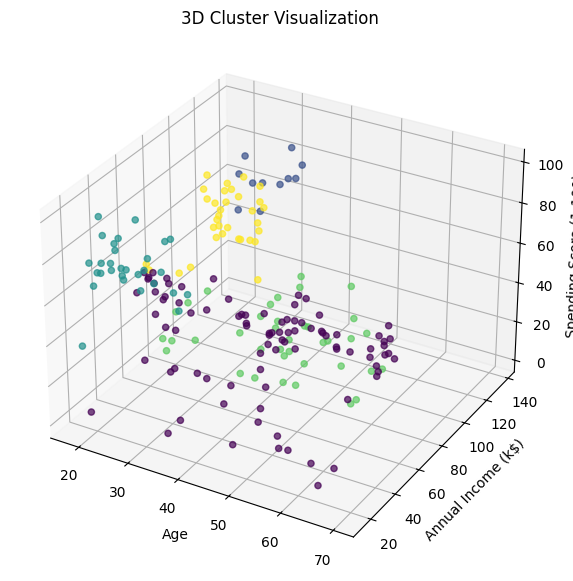

In [20]:
from mpl_toolkits.mplot3d import Axes3D

#Create a 3D figure
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

#Scatter plot
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'],
           c=df['Cluster'], cmap='viridis', marker='o', alpha=0.7)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Cluster Visualization')

plt.show()

### Creating a visual representation of all the relationships between the features in the dataset and highlighting how those relationships differ across the specific customer clusters.

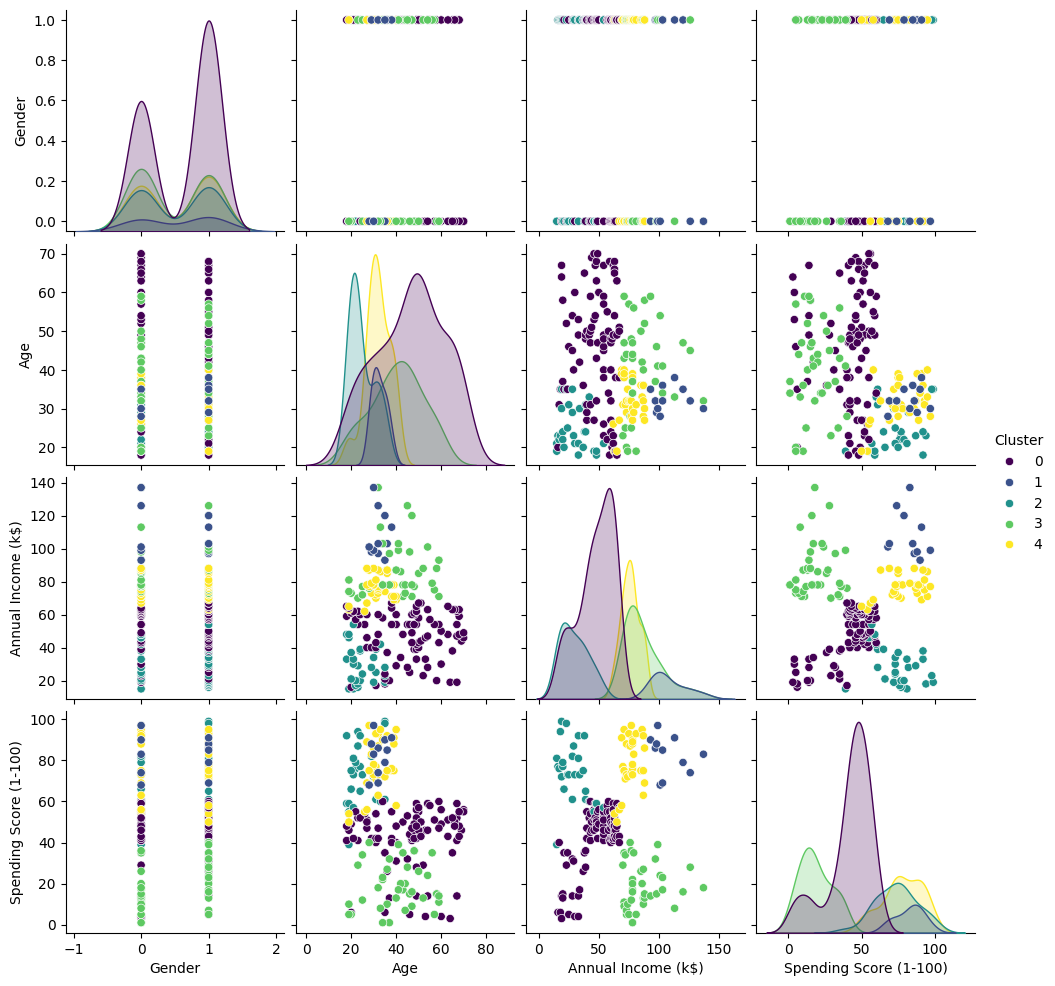

In [19]:
sns.pairplot(df, hue='Cluster', palette='viridis', diag_kind='kde') #pairplot for multi-feature analysis
plt.show()